# Correlation and Regression

Pearson’s correlation is a measure of the linear relationship between two variables. It is given by the formula below

$$
r=\frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{x})^2}\sqrt{\sum_{i=1}^n(y_i-\overline{y})^2}}
$$

This isn't the only way to calculate $r$. Let's discuss a couple of these different ways

## Covariance and Standard Deviation

One way to calculate the correlation is to use the covariance. The covariance is a measure of the joint variability of two random variables. The sign of the covariance shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. However, if we normalize the covariance than we get the correlation.

$$r=\frac{\text{covar}(x,y)}{\sigma_x\cdot \sigma_y}$$
where $\sigma_x$ and $\sigma_y$ are the standard deviations of $x$ and $y$ respectfully and 
$$\text{covar(x,y)}=\frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{n-1}$$

## Formula Without Using the Mean

For each of the formulas above we needed to calculate $\overline{x}$ and $\overline{y}$. Sometimes it might be nice to not have this be necessary, especially if we are computing the correlation by hand. To avoid calculating the means we can using the following formula
$$
r=\frac{S_{xy}}{\sqrt{S_{xx}}\cdot \sqrt{S_{yy}}}
$$
where 
$$
S_{xy}=\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})=\sum_{i=1}^nx_iy_i-\frac{\left(\sum_{i=1}^nx_i\right)\left(\sum_{i=1}^ny_i\right)}{n}
$$
$$
S_{xx}=\sum_{i=1}^{n}(x_i-\overline{x})^2=\sum_{i=1}^nx_i^2-\frac{\left(\sum_{i=1}^nx_i\right)^2}{n}
$$
$$
S_{yy}=\sum_{i=1}^{n}(y_i-\overline{y})^2=\sum_{i=1}^ny_i^2-\frac{\left(\sum_{i=1}^ny_i\right)^2}{n}
$$

## Using R

The calculatation of standard deviation, covariance, and correlation of variables is quite easy in R. First thing we need to do is load `tidyverse`. 

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let’s look at some data with regards to utility bills. In order to do this we will need to load the `mosaicData` library. This library has a data frame associated to utility usage for a single household.

In [4]:
library(mosaicData)

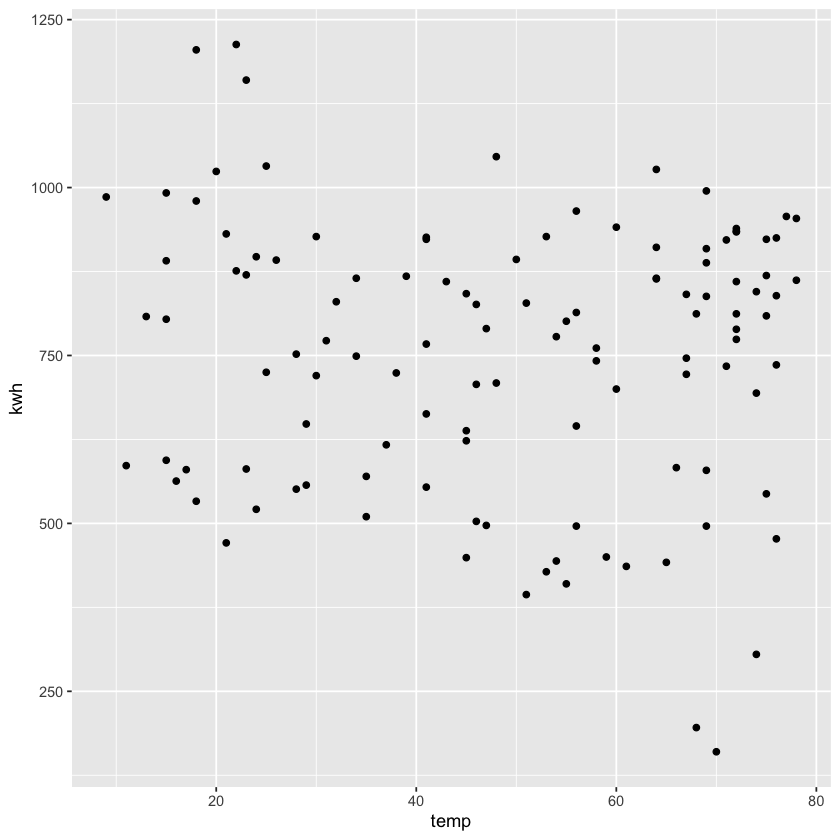

In [8]:
ggplot(Utilities)+
    geom_point(aes(x=temp, y=kwh))

In each of the above plots we see a scatter plot the electricity usage (kwh) and average temperature(F) for the billing period for 117 observations at a single residence. We might guess that there is a negative linear relationship between the energy usage and temperature, i.e. as the temperature goes up energy usage goes down. This could be the result of people using heaters less in the summer. To check if this is the case we can calculate the correlation.

In [9]:
cor_kwh_temp <- cor(Utilities$kwh, Utilities$temp)
cor_kwh_temp

[1] -0.07987783

As we can see there is a negative correlation. 

Let’s just check our formula for $r$ that uses the covariance and standard deviations. If we divide the covariance by the product of the standard deviations we should get the same value as `cor_kwh_temp`.

This is the covariance

In [10]:
cv<-var(Utilities$kwh,Utilities$temp)
cv

[1] -332.0463

These are the standard deviations

In [11]:
sx<-sd(Utilities$kwh)
sy<-sd(Utilities$temp)
sx
sy

[1] 202.1078

[1] 20.56787

As we can see, our values using both R and our formula are equal.

In [12]:
cv/(sx*sy)

[1] -0.07987783

Since our correlation is so close to zero it appears that there isn’t a strong linear relationship between electricity usage and temperature.

# Regression and Coefficient of Determination

## Scatter Plots and Regression Lines

In order to plot the regression line in R we use the following code.

```
ggplot(DATA,aes(x=x_data,y=y_data))+
    geom_point()+
    geom_smooth(method=lm, se=FALSE)
```
The `se=FALSE` eliminates the gray band on the line. This is the confidence interval for the line, i.e. the area for which there is 95% confidence of future data being within

`geom_smooth()` using formula 'y ~ x'



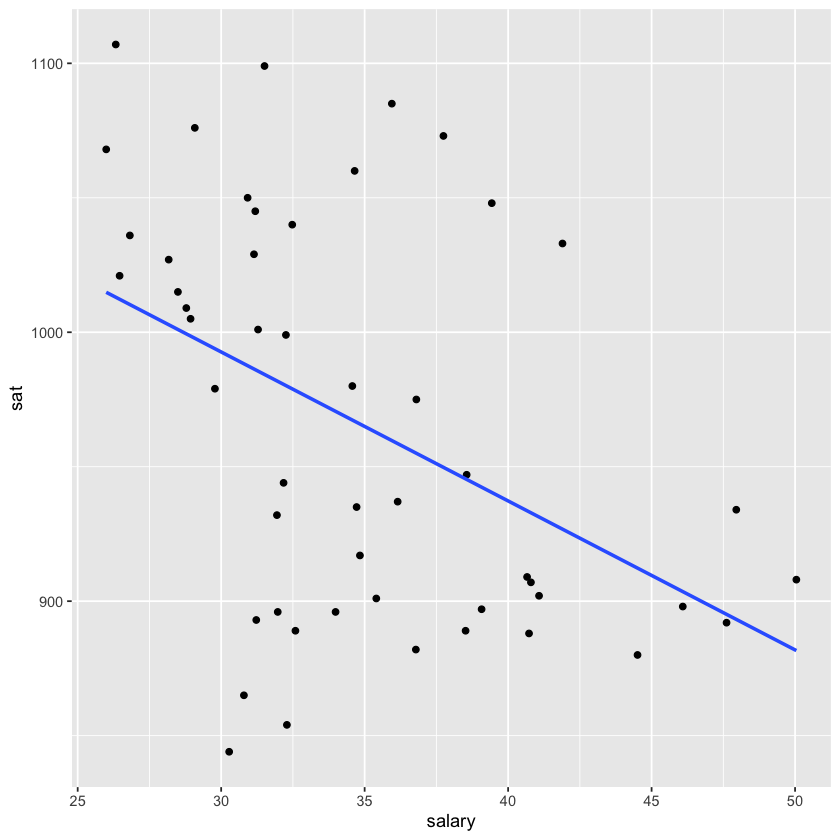

In [76]:
ggplot(SAT,aes(x = salary,y = sat))+
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE)

If we wanted to be given the equation of the regression line then we use

In [15]:
lm(sat ~ salary, SAT)


Call:
lm(formula = sat ~ salary, data = SAT)

Coefficients:
(Intercept)       salary  
    1158.86        -5.54  


This only gives us the slope and intercept. It doesn’t tell us much more about the regression line. However, the `lm` function contains much more information than just the slope and the intercept. We can see most of this information using the `summary()` function

In [16]:
summary(lm(sat ~ salary, SAT))


Call:
lm(formula = sat ~ salary, data = SAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-147.125  -45.354    4.073   42.193  125.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1158.859     57.659  20.098  < 2e-16 ***
salary        -5.540      1.632  -3.394  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.89 on 48 degrees of freedom
Multiple R-squared:  0.1935,	Adjusted R-squared:  0.1767 
F-statistic: 11.52 on 1 and 48 DF,  p-value: 0.001391


We can also use the `lm` function to fit a different type of function. For a quadratic we would use 

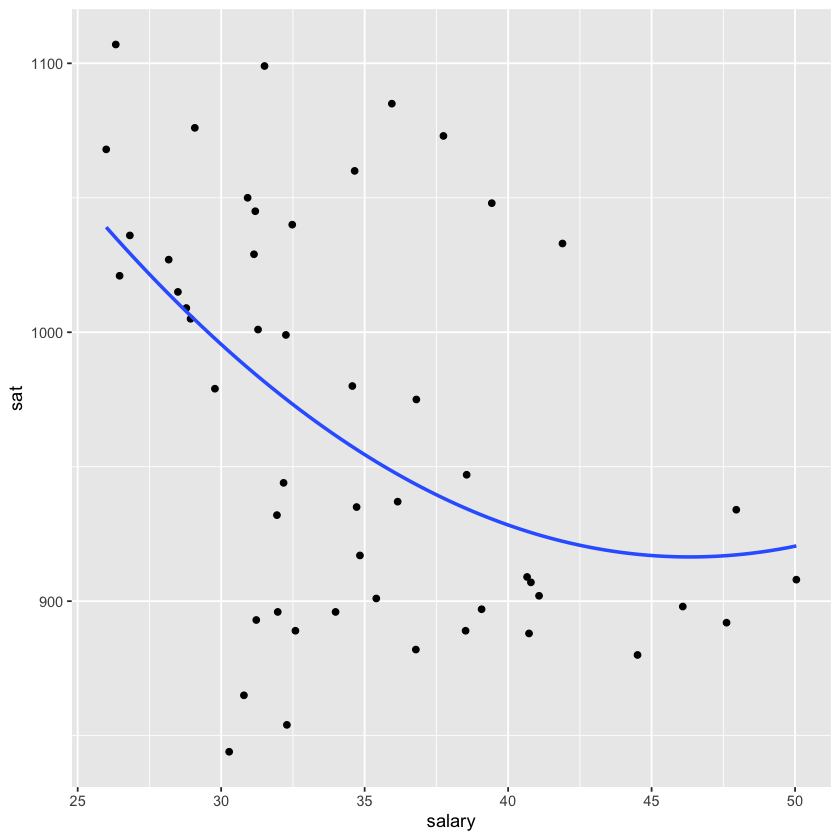

In [77]:
ggplot(SAT,aes(x = salary,y = sat))+
    geom_point()+
    geom_smooth(method = 'lm',formula = 'y ~ x + I(x^2)', se = FALSE)

We need to use `I(x^2)` to guarantee that R uses a quadratic model. Otherwise, R will interpret `x^2` as just `x`.  Let's look at a cubic mode.

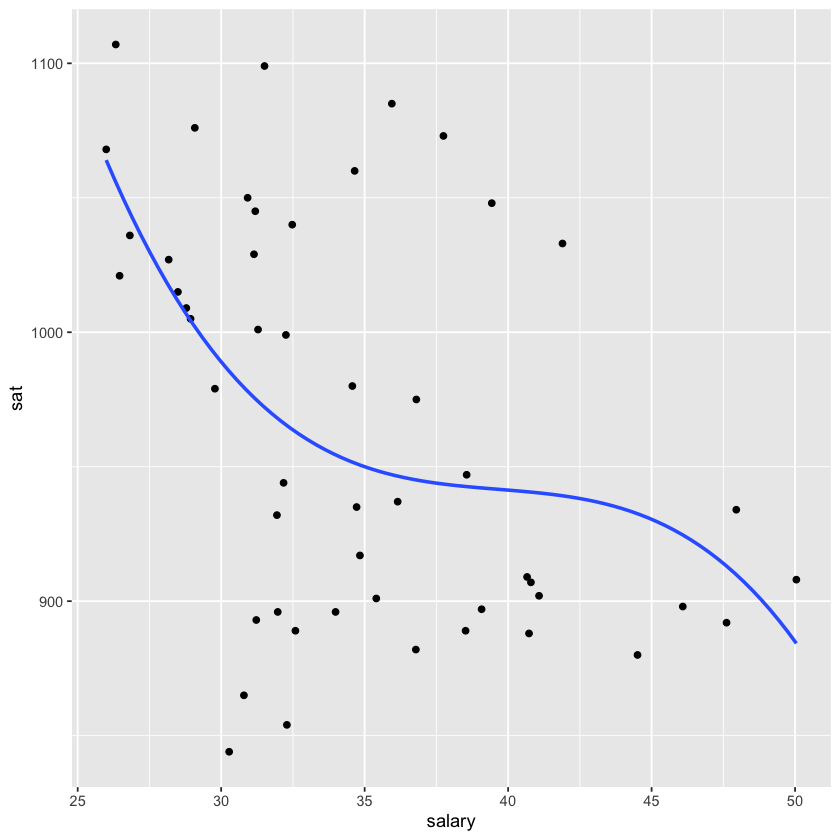

In [78]:
ggplot(SAT,aes(x = salary,y = sat))+
    geom_point()+
    geom_smooth(method = 'lm', formula = 'y ~ x + I(x^2) + I(x^3)', se = FALSE)

We can get the parameters and other data for each of these models using `summary`

In [46]:
summary(lm(sat~salary+I(salary^2),SAT))


Call:
lm(formula = sat ~ salary + I(salary^2), data = SAT)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.83  -37.66  -11.33   30.96  136.60 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1552.9140   318.6080   4.874 1.29e-05 ***
salary       -27.4759    17.5222  -1.568    0.124    
I(salary^2)    0.2965     0.2358   1.257    0.215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.48 on 47 degrees of freedom
Multiple R-squared:  0.2197,	Adjusted R-squared:  0.1865 
F-statistic: 6.618 on 2 and 47 DF,  p-value: 0.002935


In [47]:
summary(lm(sat~salary+I(salary^2)+I(salary^3),SAT))


Call:
lm(formula = sat ~ salary + I(salary^2) + I(salary^3), data = SAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-141.481  -43.391   -8.983   32.554  137.990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 3677.68997 1809.41762   2.033   0.0479 *
salary      -205.20576  150.02530  -1.368   0.1780  
I(salary^2)    5.15138    4.07705   1.264   0.2128  
I(salary^3)   -0.04329    0.03629  -1.193   0.2391  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.18 on 46 degrees of freedom
Multiple R-squared:  0.2431,	Adjusted R-squared:  0.1938 
F-statistic: 4.926 on 3 and 46 DF,  p-value: 0.004746


Both the quadratic and cubic models have slightly higher coefficients of determination, but neither is close enough to 1 to suggest evidence of there being a substantial cubic or quadratic relationship

## Coefficient of Determination and Standard Deviation of Residuals

The coefficient of determination, denoted $r^2$, is given by 
$$
r^2=1-\frac{\text{SSResid}}{SSTo}
$$
where $\text{SSResid}$ is the sum of the squares of the residuals, $\sum_{i=1}^n(y_i-\hat{y}_i)^2$ and $\text{SSTo}$ is the total sum of squares $\sum_{i=1}^n(y_i-\overline{y}_i)^2$. 

The notation $\hat{y}_i$ is used to denote the value of the regression model if we plug in $x=x_i$. So $\text{SSResid}$ is really just the sum of the squares of the errors in the regression line. 

We can see $r^2$ in the summary of the `lm` function. 

In [48]:
summary(lm(sat~salary,SAT))


Call:
lm(formula = sat ~ salary, data = SAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-147.125  -45.354    4.073   42.193  125.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1158.859     57.659  20.098  < 2e-16 ***
salary        -5.540      1.632  -3.394  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.89 on 48 degrees of freedom
Multiple R-squared:  0.1935,	Adjusted R-squared:  0.1767 
F-statistic: 11.52 on 1 and 48 DF,  p-value: 0.001391


The value of $r^2$ is at the bottom. If we wanted only that value rather than the full summary we can use

In [49]:
summary(lm(sat~salary,SAT))$r.squared

[1] 0.1934974

A further analysis of the linear model would be to calculate the standard deviation about the least squares line. This is given by

$$
s_e=\sqrt{\frac{\text{SSResid}}{n-2}}
$$

This coefficient tells us the typical amount that an observation will deviate from our linear model. This is also contained in the summary of the lm function.

In [50]:
 summary(lm(sat~salary,SAT))


Call:
lm(formula = sat ~ salary, data = SAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-147.125  -45.354    4.073   42.193  125.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1158.859     57.659  20.098  < 2e-16 ***
salary        -5.540      1.632  -3.394  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.89 on 48 degrees of freedom
Multiple R-squared:  0.1935,	Adjusted R-squared:  0.1767 
F-statistic: 11.52 on 1 and 48 DF,  p-value: 0.001391


We can pull this value from the summary in R by

In [51]:
 summary(lm(sat~salary,SAT))$sigma

[1] 67.88929

# Residuals

Yet another way to assess the accuracy of a model is to look at the residual plot. The residual plot is a plot of the residuals relative to either the $x$ variable or the fitted $y$ variable, $\hat{y}$. If these plots express no pattern, then this means that any error that comes from our model is most likely noise. If the plot expresses a specific pattern, then this would mean that our model is possibly missing a key part of the relationship between the two variables.

You can create a residual plot with respect to $\hat{y}$ using ggplot

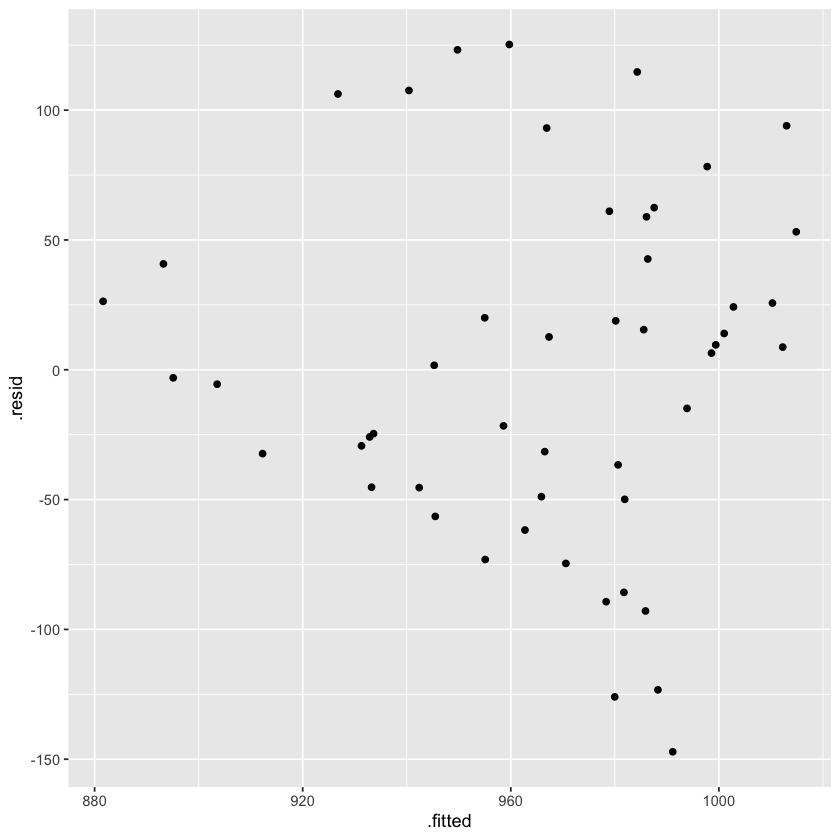

In [57]:
lm(sat ~ salary, SAT) %>% 
    ggplot(aes(.fitted, .resid)) + 
    geom_point()

Notice that I used the symbol `%>%`. This is tidyverse's version of a pipe. It is part of the `magrittr` package and takes the output of a function and inputs it into the next function in the line. I could create the same graph above by 


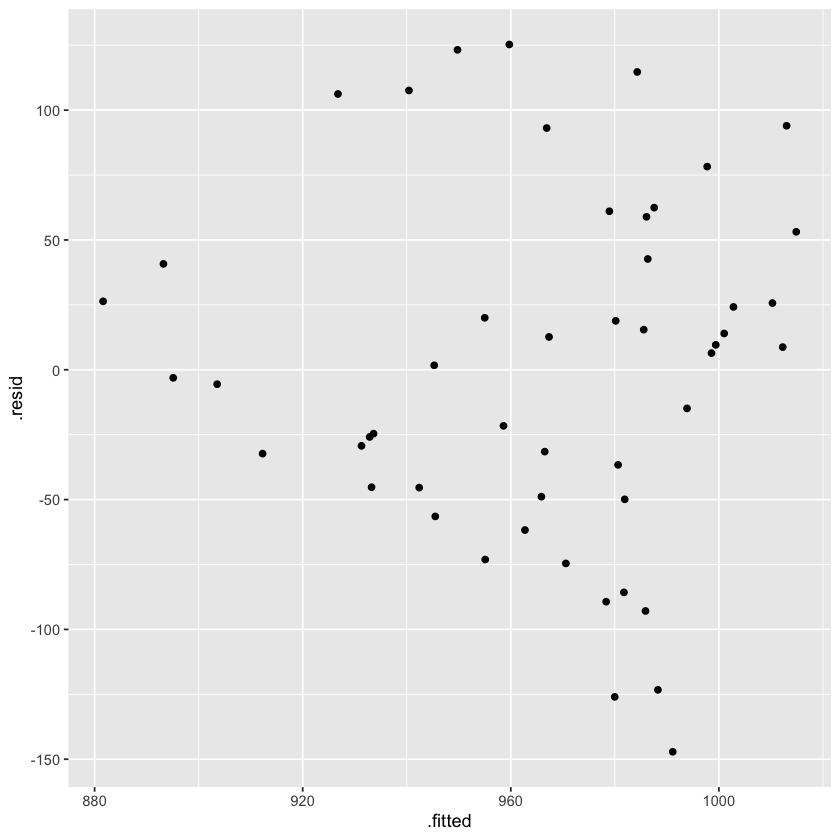

In [56]:
ggplot(lm(sat ~ salary, SAT),aes(.fitted, .resid)) + 
    geom_point()

In the plot above, I am again using the `SAT` data set and comparing salary and sat score. In order to make one with respect to the $x$ value we will need to add columns to our data frame that correspond to the predicted data and residuals.

In [58]:
fit <- lm(sat ~ salary, SAT)
SalaryVsSAT <- SAT %>% select(salary,sat)
SalaryVsSAT$predicted <- predict(fit)
SalaryVsSAT$residuals <- residuals(fit)
head(SalaryVsSAT)

,salary,sat,predicted,residuals
,<dbl>,<int>,<dbl>,<dbl>
1,31.144,1029,986.3330,42.666963
2,47.951,934,893.2287,40.771267
3,32.175,944,980.6217,-36.621694
4,28.934,1005,998.5756,6.424415
5,41.078,902,931.3025,-29.302505
6,34.571,980,967.3488,12.651223


Now we can use ggplot on this new data frame

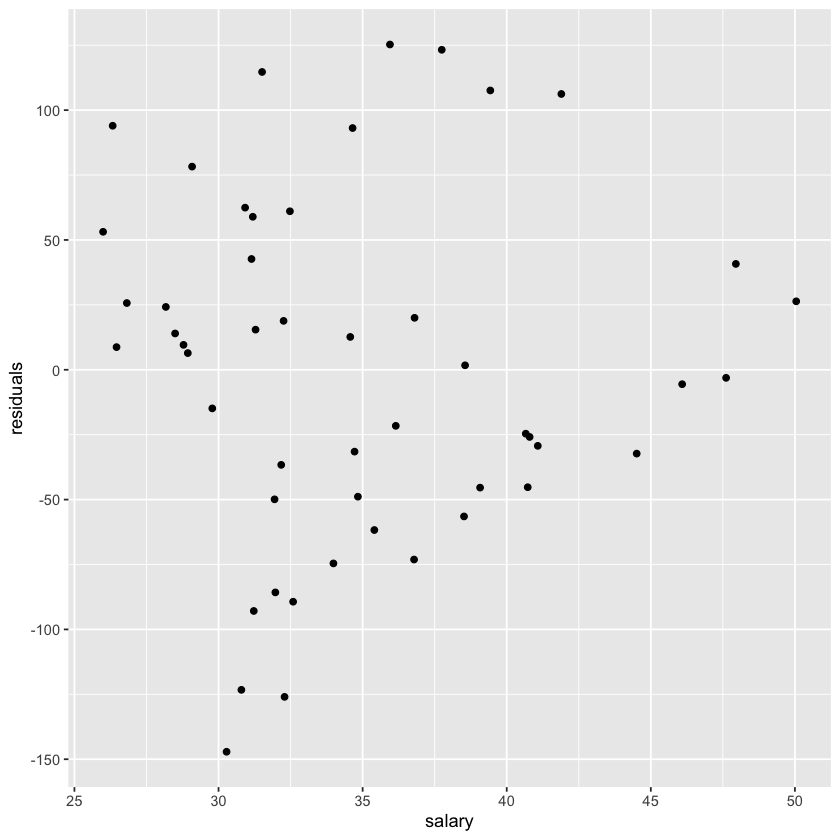

In [61]:
ggplot(SalaryVsSAT,aes(x=salary, y=residuals)) + 
    geom_point()

It seems as though the residual plot is mostly noise and this suggests that even though the coefficient of determination is only 0.19 our linear model is still somewhat a good predictor. However, there might be more than one explanatory variable affecting our response variable. To investigate this we would need to use some multivariable thinking

# Multivariable Thinking

Let's return to our SAT data.

`geom_smooth()` using formula 'y ~ x'



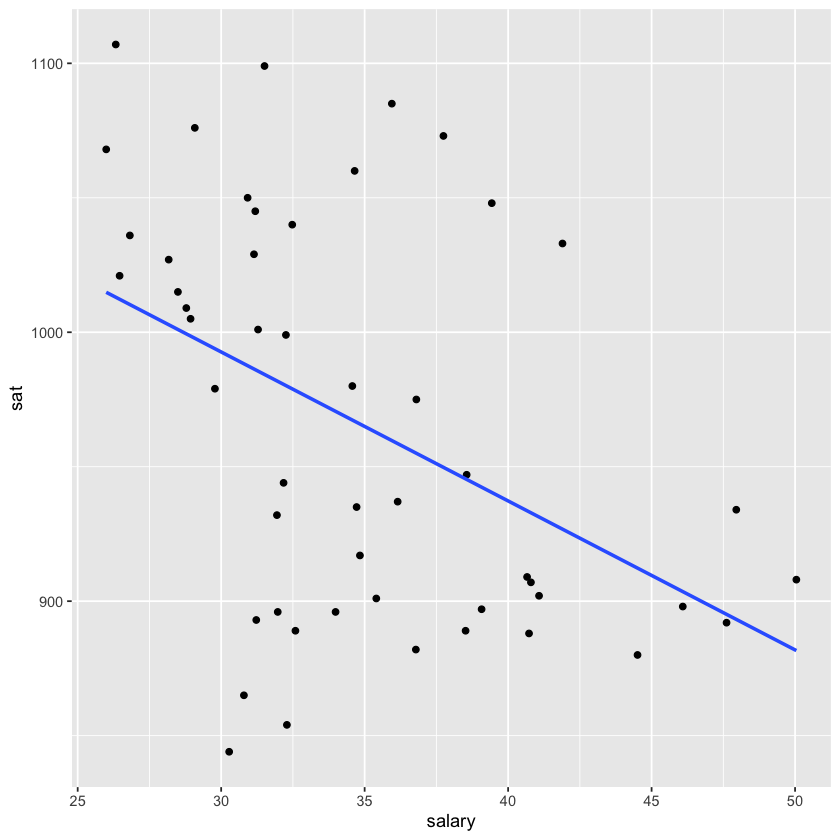

In [75]:
ggplot(SAT,aes(x = salary,y = sat))+
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE)

We see that there is a negative association between the variables. Let’s calculate the correlation, the regression line and coefficient of determination.

In [63]:
cor(SAT$sat,SAT$salary)

[1] -0.4398834

In [64]:
summary(lm(sat~salary,SAT))$r.squared

[1] 0.1934974

As we noted in the previous section, $r^2$, is low which would suggest very little linear relationship between the models. But we also saw that our reisdual plot was also mostly noise which would suggest that a linear model is still potentially valid. Let’s look at the summary of `lm`.

In [65]:
summary(lm(sat ~ salary, data = SAT))


Call:
lm(formula = sat ~ salary, data = SAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-147.125  -45.354    4.073   42.193  125.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1158.859     57.659  20.098  < 2e-16 ***
salary        -5.540      1.632  -3.394  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.89 on 48 degrees of freedom
Multiple R-squared:  0.1935,	Adjusted R-squared:  0.1767 
F-statistic: 11.52 on 1 and 48 DF,  p-value: 0.001391


In the lower righthand corner we see that the p-value is $0.001391$. We will discuss what this means further when we talk about hypothesis testing in detail, but the low p-value means that there is statistically significant evidence that there is a correlation between salary and SAT score. 

Since the slope of our regression line is $-5.540$, there is statistically significant evidence that higher teacher salary has a negative affect on SAT scores. Is that it? Should we conclude that increasing teacher salary will negatively affect SAT scores? Not necesarily. As it turns out, there is a third variable that plays a significant role.

The proportion of students taking the SAT varies dramatically between states, as do teacher salaries. In the Midwest and Plains states, where teacher salaries tend to be lower, relatively few high school students take the SAT. Those that do are typically the top students who are planning to attend college out of state, while many others take the alternative standardized ACT test that is required for their state. For each of the three groups of states defined by the fraction of students that take the SAT, the correlation between salary and score is non-negative. The net result is that the fraction taking the SAT is a confounding factor.

Let’s look at the summary of the fraction taking the SAT in order to find out how to stratify.

In [66]:
summary(SAT)

        state        expend          ratio           salary     
 Alabama   : 1   Min.   :3.656   Min.   :13.80   Min.   :25.99  
 Alaska    : 1   1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98  
 Arizona   : 1   Median :5.768   Median :16.60   Median :33.29  
 Arkansas  : 1   Mean   :5.905   Mean   :16.86   Mean   :34.83  
 California: 1   3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55  
 Colorado  : 1   Max.   :9.774   Max.   :24.30   Max.   :50.05  
 (Other)   :44                                                  
      frac           verbal           math            sat        
 Min.   : 4.00   Min.   :401.0   Min.   :443.0   Min.   : 844.0  
 1st Qu.: 9.00   1st Qu.:427.2   1st Qu.:474.8   1st Qu.: 897.2  
 Median :28.00   Median :448.0   Median :497.5   Median : 945.5  
 Mean   :35.24   Mean   :457.1   Mean   :508.8   Mean   : 965.9  
 3rd Qu.:63.00   3rd Qu.:490.2   3rd Qu.:539.5   3rd Qu.:1032.0  
 Max.   :81.00   Max.   :516.0   Max.   :592.0   Max.   :1107.0  
                  

We’ll stratify according to the quartiles of the `frac` variable. In order to stratify the results, I will use the `mutate` function. This function is in the tidyverse and is used to change a data frame in some way. In
this case, I will create a new column `fracgrp` by group the data by the values in the frac column. Then I label the observations by either “Q1”, “Q2”, “Q3”, “Q4”

In [5]:
SAT <- SAT %>%
  mutate(
    fracgrp = cut(frac,
      breaks = c(0, 9, 28, 63, 100),
      labels = c("Q1", "Q2", "Q3", "Q4")
) )

The `mutate` function is a function that allows you to make significant adjustments to a data frame. In this case, I am adding a column that will add the labels “Q1”, “Q2”, “Q3”, and “Q4”. If we look at the structure, we can see a new column.

In [68]:
str(SAT)

'data.frame':	50 obs. of  9 variables:
 $ state  : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ expend : num  4.41 8.96 4.78 4.46 4.99 ...
 $ ratio  : num  17.2 17.6 19.3 17.1 24 18.4 14.4 16.6 19.1 16.3 ...
 $ salary : num  31.1 48 32.2 28.9 41.1 ...
 $ frac   : int  8 47 27 6 45 29 81 68 48 65 ...
 $ verbal : int  491 445 448 482 417 462 431 429 420 406 ...
 $ math   : int  538 489 496 523 485 518 477 468 469 448 ...
 $ sat    : int  1029 934 944 1005 902 980 908 897 889 854 ...
 $ fracgrp: Factor w/ 4 levels "Q1","Q2","Q3",..: 1 3 2 1 3 3 4 4 3 4 ...


`geom_smooth()` using formula 'y ~ x'



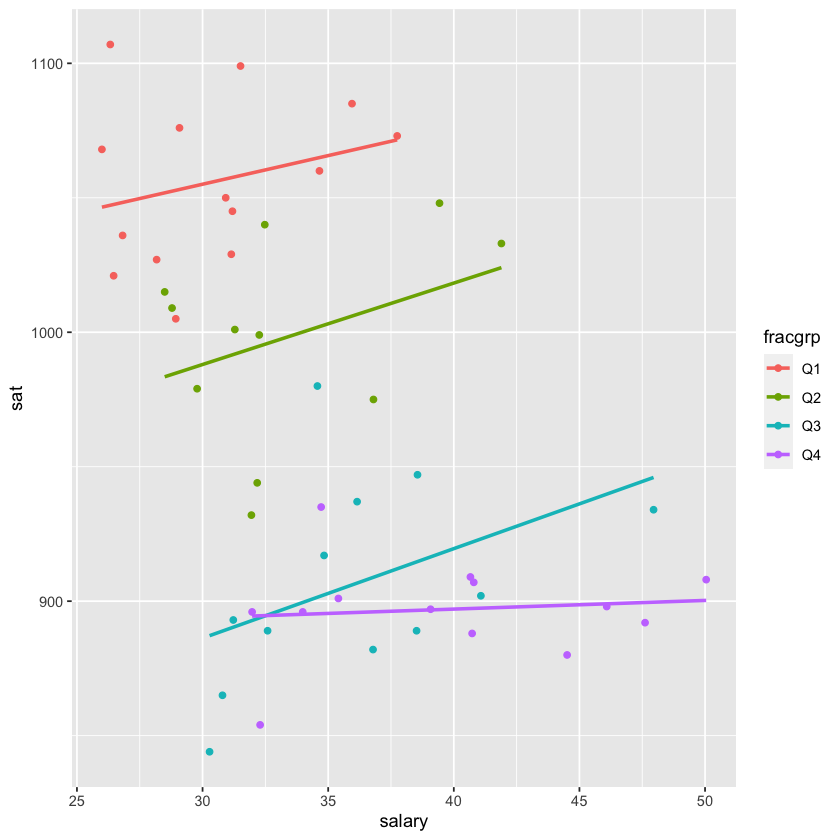

In [6]:
ggplot(SAT,aes(x = salary,y = sat))+
    geom_point(aes(color=fracgrp))+
    geom_smooth(method = 'lm',aes(color=fracgrp), se = FALSE)

By stratifying we can start to disentangle the complex and interesting set of relationships seen with the SAT data. It seems as though if we stratify states by the fraction of students taking the SAT, then there is a positive correlation between salary and SAT score. We can investigate this further by considering the correlation of SAT score and salary with the fraction of students taking the SAT.

In [79]:
cor(SAT$frac,SAT$salary)

[1] 0.6167799

In [80]:
cor(SAT$frac,SAT$sat)

[1] -0.8871187

We see that the fraction of students taking the SAT is negatively associated with the average statewide SAT scores and positively associated with statewide teacher salary. This suggests that rather than high teacher salary, low statewide SAT scores could just as likely (even more so) be the result of a high fraction of students taking the SAT. We can even see the high correlation between SAT scores and fraction of students taking the SAT more clearly when we view the scatterplot and regression line.

`geom_smooth()` using formula 'y ~ x'



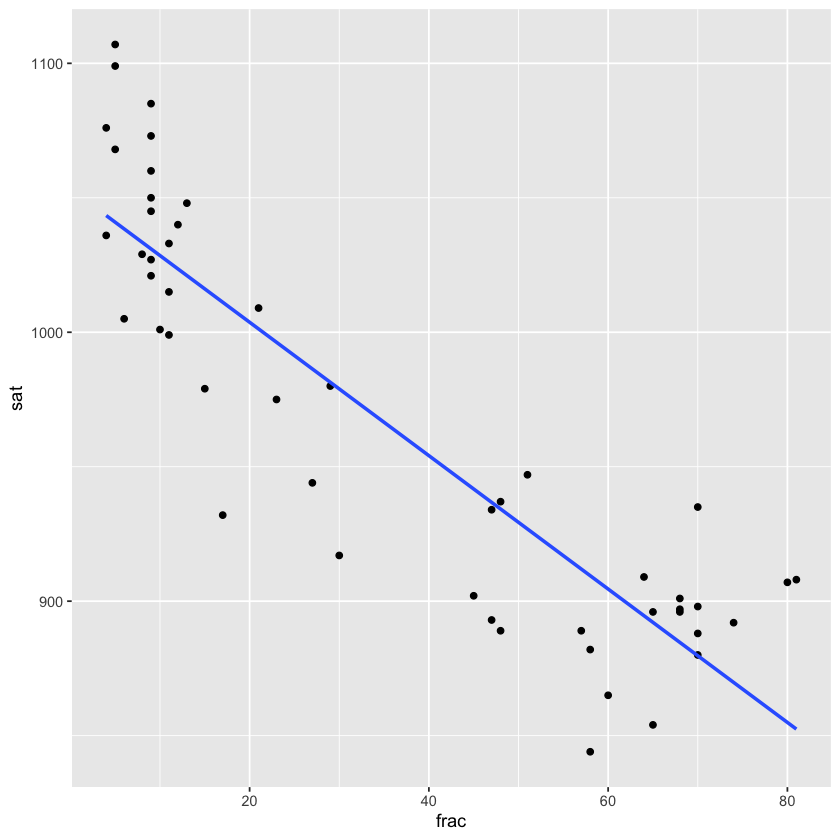

In [84]:
ggplot(SAT,aes(x = frac,y = sat))+
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE)

In [86]:
summary(lm(sat~frac,SAT))


Call:
lm(formula = sat ~ frac, data = SAT)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.158 -27.364   3.308  19.876  66.080 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1053.3204     8.2112  128.28   <2e-16 ***
frac          -2.4801     0.1862  -13.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.89 on 48 degrees of freedom
Multiple R-squared:  0.787,	Adjusted R-squared:  0.7825 
F-statistic: 177.3 on 1 and 48 DF,  p-value: < 2.2e-16


As you can see, in this case $r^2$ is much higher $~0.787$ (compared to the $r^2$ value of 0.1935 when salary is the exploratory variable) and the p-value is very very small $~2.2\times 10^{-16}$.

This suggests that the percentage of students taking the SAT has a much more significant affect on the average score than teacher salary. We could combine these two exploratory variables into a single model. 

In [88]:
summary(lm(sat~frac+salary,SAT))


Call:
lm(formula = sat ~ frac + salary, data = SAT)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.313 -26.731   3.168  18.951  75.590 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 987.9005    31.8775  30.991   <2e-16 ***
frac         -2.7787     0.2285 -12.163    4e-16 ***
salary        2.1804     1.0291   2.119   0.0394 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.69 on 47 degrees of freedom
Multiple R-squared:  0.8056,	Adjusted R-squared:  0.7973 
F-statistic: 97.36 on 2 and 47 DF,  p-value: < 2.2e-16


We can see that this model has $r^2\approx 0.8056$ and thus accounts for roughly 80% of the variation. This model is given by a plane in 3 dimensions. The library `ggplot2` does not support 3d images and so to plot this in R we would use the `plotly` library but that is not something I am going to focus on in this class.